# Capstone - Team 18
## EDA

Installs if necessary

In [59]:
#install 
#! pip3 install pandas
#! pip3 install numpy
#! pip3 install wordcloud
#! pip3 install matplotlib
#! pip3 install regex
#! pip3 install plotly 
#! pip3 install spacy
#! pip3 install gensim
#! pip3 install nltk
#! pip3 install afinn
#! pip3 install -U scikit-learn
#! pip3 install seaborn
#! pip3 install nbformat

Imports

In [60]:
# imports
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections

import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


import string
import spacy
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from afinn import Afinn
import unicodedata

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\30842\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Reading the CSV file's in

In [61]:
bj_lo = pd.read_csv("bj_location_overview_all.csv",index_col=0)
bj_r =pd.read_csv("bj_reviews_all.csv",index_col=0)
bj_lo = pd.DataFrame(bj_lo)
bj_r = pd.DataFrame(bj_r)

### Cleaning
Let's start with the location overview dataframe

Cleaning we did (saved results in csv, so we do not need to run the code every time):  
bj_r = bj_r.drop(columns = ["Unnamed: 0.1"]). 

#cleaning the star rating into numerical variable  
test_list= bj_r["star rating"]  
res = list(map(lambda sub:int(''.join(
      [ele for ele in sub if ele.isnumeric()])), test_list))
str(res)
bj_r["star rating"]= res
bj_r.head()


bj_r.location_code = bj_r.location_code.astype(int)

bj_r.to_csv(r'/Users/paulademacker/Documents/GitHub/Capstone/bj_reviews_all.csv')




In [62]:
bj_lo.shape

(200, 3)

In [63]:
bj_lo.location_code = bj_lo.location_code.astype(int)
bj_lo.head()

,reviews count,location,location_code
average rating,,,
4.2,356,"278 Middlesex Ave, Medford, MA 02155",1
3.9,202,"1440 Central Ave, Albany, NY 12205",2
4.1,460,"300 NJ-17, East Rutherford, NJ 07073",3
4.4,156,"6924 Frank Ave NW, North Canton, OH 44720",4
4.0,139,"4000 Nesconset Highway, NY-347, Setauket- East...",5


In [64]:
bj_r.shape

(41894, 5)

In [65]:
bj_r.head()

,star rating,name,review,date,location_code
0,5,XxbluewølfX x,Eric has great customer service. He told me to...,2021-03-01,1
1,4,Biswanath Roy,Not ample stock compare to other stores. Other...,2020-10-01,1
2,1,Amy Rose,This location has been my reliable go-to for m...,2021-02-01,1
3,1,Sabina Lamichhane,I place a online pick up order to save some ti...,2021-02-01,1
4,1,Donnie L.S,Do something!!!\r\nmake a self checkout line o...,2021-02-01,1


Converting the date column in approx. dates.  
Webscraping date: April 14th 2021  
Conversion as follows:  
x hours ago -> April 14th  
x days ago -> April 14th 2021 - x days
x weeks ago -> April 14th 2021 - x weeks (month)  
x months ago -> April 2021 - x months  
x years ago -> 2021 - x years ago  

Keeping reviews with text

In [66]:
# dropping all columns without a review text 
bj_r_text = bj_r.dropna()
bj_r_text

,star rating,name,review,date,location_code
0,5,XxbluewølfX x,Eric has great customer service. He told me to...,2021-03-01,1
1,4,Biswanath Roy,Not ample stock compare to other stores. Other...,2020-10-01,1
2,1,Amy Rose,This location has been my reliable go-to for m...,2021-02-01,1
3,1,Sabina Lamichhane,I place a online pick up order to save some ti...,2021-02-01,1
4,1,Donnie L.S,Do something!!!\r\nmake a self checkout line o...,2021-02-01,1
...,...,...,...,...,...
41848,4,brian secord,Easy in and out,2018-01-01,200
41849,5,Sharron Bugbee,Wonderful as usual!!!,2018-01-01,200
41850,1,William Lanski,Out of stock on several items I purchase.,2018-01-01,200
41851,5,Diana Laframboise,I love this place,2018-01-01,200


Sorting out the reviews in a different language than English

In [67]:
# bj_r.loc[bj_r['name'] == re.compile('(?:^|\W)Translated(?:$|\W)')
sub = "Translated"
bj_r_text["dif_lang"] = bj_r_text["review"].str.find(sub)
bj_r_text

,star rating,name,review,date,location_code,dif_lang
0,5,XxbluewølfX x,Eric has great customer service. He told me to...,2021-03-01,1,-1
1,4,Biswanath Roy,Not ample stock compare to other stores. Other...,2020-10-01,1,-1
2,1,Amy Rose,This location has been my reliable go-to for m...,2021-02-01,1,-1
3,1,Sabina Lamichhane,I place a online pick up order to save some ti...,2021-02-01,1,-1
4,1,Donnie L.S,Do something!!!\r\nmake a self checkout line o...,2021-02-01,1,-1
...,...,...,...,...,...,...
41848,4,brian secord,Easy in and out,2018-01-01,200,-1
41849,5,Sharron Bugbee,Wonderful as usual!!!,2018-01-01,200,-1
41850,1,William Lanski,Out of stock on several items I purchase.,2018-01-01,200,-1
41851,5,Diana Laframboise,I love this place,2018-01-01,200,-1


In [68]:
bj_r_text[bj_r_text["dif_lang"] == 1]

,star rating,name,review,date,location_code,dif_lang
125,5,TANIA PRADO,(Translated by Google) Very good place where y...,2020-01-01,1,1
126,5,khaled alahmad,(Translated by Google) A very huge store that ...,2018-01-01,1,1
127,5,Myriam Carreño,(Translated by Google) It is a good supermarke...,2018-01-01,1,1
128,5,Claribel Martinez,(Translated by Google) Because you find a vari...,2019-01-01,1,1
129,5,Jose Paniagua,(Translated by Google) BJ's is a good place wh...,2018-01-01,1,1
...,...,...,...,...,...,...
41689,5,Vick100,(Translated by Google) Very good place to do y...,2020-01-01,199,1
41690,5,Dias Garcia,(Translated by Google) I love my children💖\r\n...,2018-01-01,199,1
41691,5,William Recinos,(Translated by Google) I find what I want and ...,2017-01-01,199,1
41692,5,jose vasquez,(Translated by Google) To make purchases in qu...,2017-01-01,199,1


Saving reviews in other languages in a seperate data frame

In [69]:
# creating dataframe with all non english reviews
bj_r_diff_lang = bj_r_text[bj_r_text["dif_lang"] == 1]
bj_r_diff_lang.shape

(1356, 6)

In [70]:
bj_r_diff_lang.head()

,star rating,name,review,date,location_code,dif_lang
125,5,TANIA PRADO,(Translated by Google) Very good place where y...,2020-01-01,1,1
126,5,khaled alahmad,(Translated by Google) A very huge store that ...,2018-01-01,1,1
127,5,Myriam Carreño,(Translated by Google) It is a good supermarke...,2018-01-01,1,1
128,5,Claribel Martinez,(Translated by Google) Because you find a vari...,2019-01-01,1,1
129,5,Jose Paniagua,(Translated by Google) BJ's is a good place wh...,2018-01-01,1,1


Creating a data frame with English reviews

In [71]:
# creating dataframe with only english reviews
bj_r_text_eng = bj_r_text[bj_r_text["dif_lang"] == -1]
bj_r_text_eng.shape

(21200, 6)

A file with clean reviews. We splitted the reviews and saved the English (Translated) as well as the Original one. Only issue: We don't know how to delete paranthesis.

In [72]:
#bj_r_diff_lang_clean = pd.read_csv("/Users/paulademacker/Documents/GitHub/Capstone/review_foreign_languages")
bj_r_diff_lang_clean = pd.read_csv("review_foreign_languages",index_col=0)
#bj_r_diff_lang_clean

Steps we took to clean the data frame, but we already saved the clean file so no need for it anymore


In [73]:
# creating a column with the translates text and one with the original text
#bj_r_diff_lang[['Translated','Original']] = 
#bj_r_diff_lang[['English','drop3','Original']] = bj_r_diff_lang.Original.str.split(")",expand=True)
#bj_r_diff_lang = bj_r_diff_lang.drop(columns=["review"])
#bj_r_diff_lang.to_csv("/Users/paulademacker/Documents/GitHub/Capstone/review_foreign_languages",index=False)
# extracting first and last name and date
# all upper case
# removing punctuation and numbers
#names = bj_r[["name", "date", "star rating", "location_code"]]
#names['name'] = names['name'].str.upper()
#names["name"] = names['name'].str.replace('[^\w\s]','')
#names["name"] = names['name'].str.replace('\d+', '')
#a = names.name.str.split(" ", expand = True)
#a = a.drop(columns = [2,3,4,5,6,7,8,9])

#names["first"] = a[0]
#names["last"] = a[1]
#names.drop(columns="name")

#names = pd.concat([names, bj_lo], axis=1)
#names.drop(columns=["average rating","reviews count","popular words","location_code"])

#names.to_csv("/Users/paulademacker/Documents/GitHub/Capstone/names_all_reviews.csv",index=False)

# EDA 

Dataframe explanation:  
bj_lo - > all 200 locations  
bj_r -> all reviews  
bj_r_text -> only text reviews, all languages  
bj_r_diff_lang -> only text reviews in foreign languages  
bj_r_text_eng -> only text reviews in English  


### Distribution of Reviews

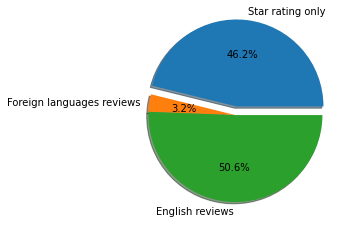

In [74]:
no_text = len(bj_r['review']) - len(bj_r_text['review'])
with_text_translated = len(bj_r_diff_lang['review'])
with_text_English = len(bj_r_text_eng['review'])

y = np.array([no_text,with_text_translated,with_text_English])
explode = (0.1,0,0)
plt.rcParams['font.size'] = 20
mylabels = ["Star rating only", "Foreign languages reviews","English reviews"]

plt.pie(y, labels = mylabels,autopct='%1.1f%%', explode = explode, shadow = True, textprops={'fontsize': 10}
)
plt.show()


We used the bj_r dataset for this part.
46.2% of the reviews are star rating only (do not have text).
50.6% of the reviews are in English.
3.2% of the reviews are in foreign languages and translated by Google.

### Distribution of all star ratings for only text reviews in English

In [75]:
# need upgrade nbformat by pip install --upgrade nbformat and restart VScode

ratings = bj_r_text_eng['star rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink','lightblue','aqua','gold','crimson']

rating_piechart = go.Pie(labels = label_rating, values = size_rating, marker = dict(colors = colors), name = "Bj's", hole = 0.3, textfont_size=20)

df = [rating_piechart]
layout = go.Layout(title="Distribution of Ratings for Bj's Wholesale")
fig = go.Figure(data = df, layout = layout)
fig

We used the dataset with only English reviews.
Almost half of the reviews are rated as 5 stars.
But there are almost 23.5% of the reviews are rated as 1 or 2 stars, which is very low.

### Distribution of star ratings for no text review

In [76]:
bj_r_notext = bj_r[bj_r.isnull().any(axis=1)]

ratings_notext = bj_r_notext['star rating'].value_counts()

label_rating_notext = ratings_notext.index
size_rating_notext = ratings_notext.values

colors = ['pink','lightblue','aqua','gold','crimson']

rating_piechart_notext = go.Pie(labels = label_rating_notext, values = size_rating_notext, marker = dict(colors = colors), name = "Bj's", hole = 0.3,textfont_size=20)

df_notext = [rating_piechart_notext]
layout_notext = go.Layout(title="Distribution of Ratings for no text reviews")
fig_notext = go.Figure(data = df_notext, layout = layout_notext)
fig_notext

We checked on the data with only star ratings (no text).
Most of the ratings are high, with more than half of them rated as 5 stars.
The low star ratings don't exceed 10%.
We can suggest that those customers who do not leave any text reviews are more intended to leave high star ratings.

### Overall star ratings overtime 

In [77]:
bj_r_text_eng['date'] = pd.to_datetime(bj_r_text_eng['date'])

In [78]:
bj_r_text_eng.head()

,star rating,name,review,date,location_code,dif_lang
0,5,XxbluewølfX x,Eric has great customer service. He told me to...,2021-03-01,1,-1
1,4,Biswanath Roy,Not ample stock compare to other stores. Other...,2020-10-01,1,-1
2,1,Amy Rose,This location has been my reliable go-to for m...,2021-02-01,1,-1
3,1,Sabina Lamichhane,I place a online pick up order to save some ti...,2021-02-01,1,-1
4,1,Donnie L.S,Do something!!!\r\nmake a self checkout line o...,2021-02-01,1,-1


In [79]:
reviews_groupby_date = bj_r_text_eng.groupby(['date'])['star rating'].mean()
reviews_groupby_date = pd.DataFrame(data = reviews_groupby_date)
reviews_groupby_date.reset_index(inplace=True)

reviews_groupby_date= reviews_groupby_date[0:9]
reviews_groupby_date

,date,star rating
0,2011-01-01,3.111111
1,2012-01-01,3.941176
2,2013-01-01,3.644737
3,2014-01-01,3.450450
4,2015-01-01,3.603175
5,2016-01-01,3.889581
6,2017-01-01,3.759417
7,2018-01-01,4.115481
8,2019-01-01,3.646780


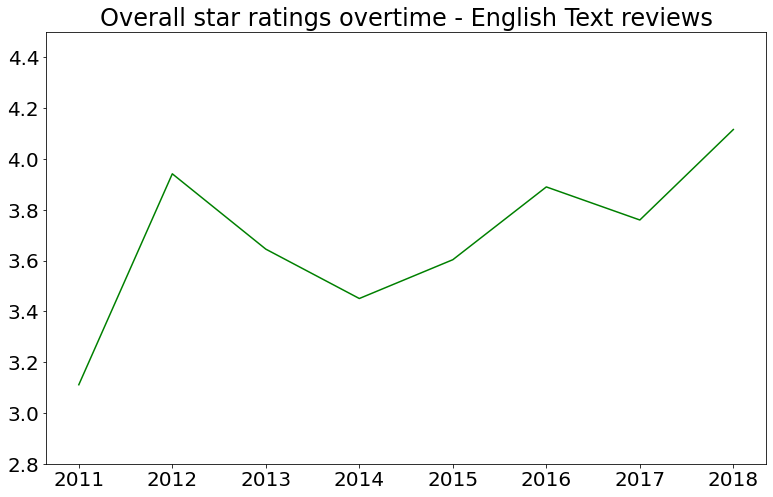

In [80]:
bj_r_text_eng['date'] = pd.to_datetime(bj_r_text_eng['date'])
bj_r_text_eng['year'] = bj_r_text_eng['date'].dt.year
#sorted_reviews = reviews_groupby_date.sort_values('date',ascending=False)
#date_unique = bj_r_text_eng['date'].unique()
reviews_groupby_date = bj_r_text_eng.groupby(['year'])['star rating'].mean()
reviews_groupby_date = pd.DataFrame(data = reviews_groupby_date)
reviews_groupby_date.reset_index(inplace=True)
reviews_groupby_date= reviews_groupby_date[0:8]
fig1 = plt.figure(figsize=(10,6))

ax1 = fig1.add_axes([0,0,1,1])

ax1.set_title('Overall star ratings overtime - English Text reviews')

ax1.plot(reviews_groupby_date['year'],reviews_groupby_date['star rating'],color='green')
ax1.set_ylim([2.8, 4.5])
plt.rc('font', size= 10)
plt.show()

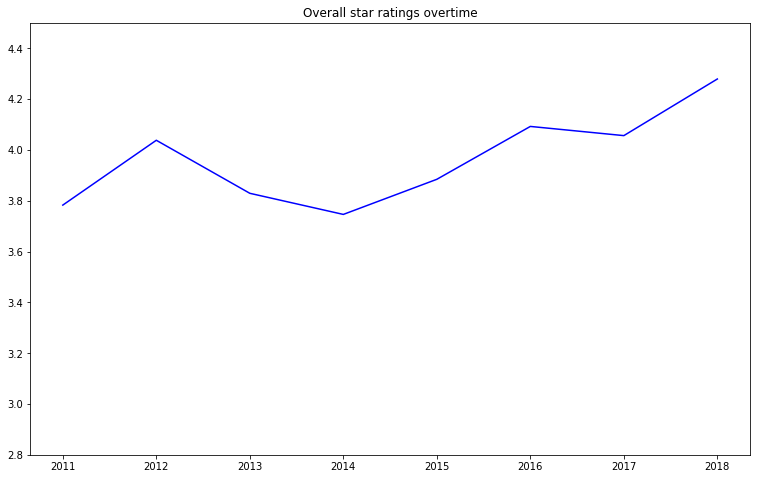

In [81]:
# same graph as above just with all reviews, text and star onyl

bj_r['date'] = pd.to_datetime(bj_r['date'])
bj_r['year'] = bj_r['date'].dt.year
all_reviews_groupby_date = bj_r.groupby(['year'])['star rating'].mean()
all_reviews_groupby_date = pd.DataFrame(data = all_reviews_groupby_date)

#all_reviews_groupby_date.groupby(all_reviews_groupby_date['date'].map(lambda x: x.year))
all_reviews_groupby_date.reset_index(inplace=True)
all_reviews_groupby_date= all_reviews_groupby_date[0:8]
#date_unique = bj_r['date'].unique()

fig1 = plt.figure(figsize=(10,6))

ax1 = fig1.add_axes([0,0,1,1])

ax1.set_title('Overall star ratings overtime')
ax1.plot(all_reviews_groupby_date['year'],all_reviews_groupby_date['star rating'],color='blue')
ax1.set_ylim([2.8, 4.5])

plt.show()

In [82]:
bj_r_notext['date'] = pd.to_datetime(bj_r_notext['date'])
bj_r_notext['year'] = bj_r_notext['date'].dt.year
star_only_reviews_groupby_date = bj_r_notext.groupby(['year'])['star rating'].mean()
star_only_reviews_groupby_date = pd.DataFrame(data = star_only_reviews_groupby_date)

#all_reviews_groupby_date.groupby(all_reviews_groupby_date['date'].map(lambda x: x.year))
star_only_reviews_groupby_date.reset_index(inplace=True)
star_only_reviews_groupby_date= star_only_reviews_groupby_date[0:8]
star_only_reviews_groupby_date

,year,star rating
0,2011,4.214286
1,2012,4.085714
2,2013,4.270270
3,2014,4.225352
4,2015,4.372093
5,2016,4.294333
6,2017,4.308475
7,2018,4.411063


Reviews over time compared

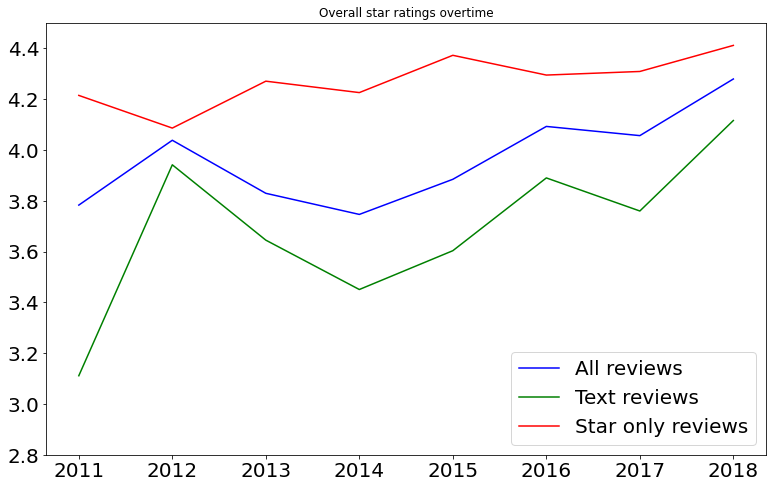

In [83]:
# same graph as above just with all reviews, text and star onyl

bj_r['date'] = pd.to_datetime(bj_r['date'])
bj_r['year'] = bj_r['date'].dt.year
all_reviews_groupby_date = bj_r.groupby(['year'])['star rating'].mean()
all_reviews_groupby_date = pd.DataFrame(data = all_reviews_groupby_date)

#all_reviews_groupby_date.groupby(all_reviews_groupby_date['date'].map(lambda x: x.year))
all_reviews_groupby_date.reset_index(inplace=True)
all_reviews_groupby_date= all_reviews_groupby_date[0:8]
#date_unique = bj_r['date'].unique()


fig1 = plt.figure(figsize=(10,6))

ax1 = fig1.add_axes([0,0,1,1])

ax1.set_title('Overall star ratings overtime')
line1, = ax1.plot(reviews_groupby_date['year'],reviews_groupby_date['star rating'],color='green')
line2, = ax1.plot(all_reviews_groupby_date['year'],all_reviews_groupby_date['star rating'],color='blue')
line3, = ax1.plot(star_only_reviews_groupby_date['year'],star_only_reviews_groupby_date['star rating'],color='red')
ax1.set_ylim([2.8, 4.5])
ax1.legend([line2, line1, line3],["All reviews", "Text reviews", "Star only reviews"],fontsize= 20)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
	label.set_fontsize(20)
plt.show()

We used the dataset with all English reviews.
We can tell from the graph that the ratings before 2018 fluctuates above 3 stars with a peak around year 2018 at 4 stars. Starting from 2018, the star rating of bj stores according to English speaking customers greatly reduces.

### Distribution of Ratings in Bj's Wholesale

In [84]:
results= pd.merge(bj_lo, bj_r_text_eng, on = "location_code")
results.head()


,reviews count,location,location_code,star rating,name,review,date,dif_lang,year
0,356,"278 Middlesex Ave, Medford, MA 02155",1,5,XxbluewølfX x,Eric has great customer service. He told me to...,2021-03-01,-1,2021
1,356,"278 Middlesex Ave, Medford, MA 02155",1,4,Biswanath Roy,Not ample stock compare to other stores. Other...,2020-10-01,-1,2020
2,356,"278 Middlesex Ave, Medford, MA 02155",1,1,Amy Rose,This location has been my reliable go-to for m...,2021-02-01,-1,2021
3,356,"278 Middlesex Ave, Medford, MA 02155",1,1,Sabina Lamichhane,I place a online pick up order to save some ti...,2021-02-01,-1,2021
4,356,"278 Middlesex Ave, Medford, MA 02155",1,1,Donnie L.S,Do something!!!\r\nmake a self checkout line o...,2021-02-01,-1,2021


In [85]:
results_rating= results.groupby("location_code")["star rating"].mean().sort_values()

rating_bottom_10 = results_rating[0:10] 

rating_Top_10 = results_rating[-10:]


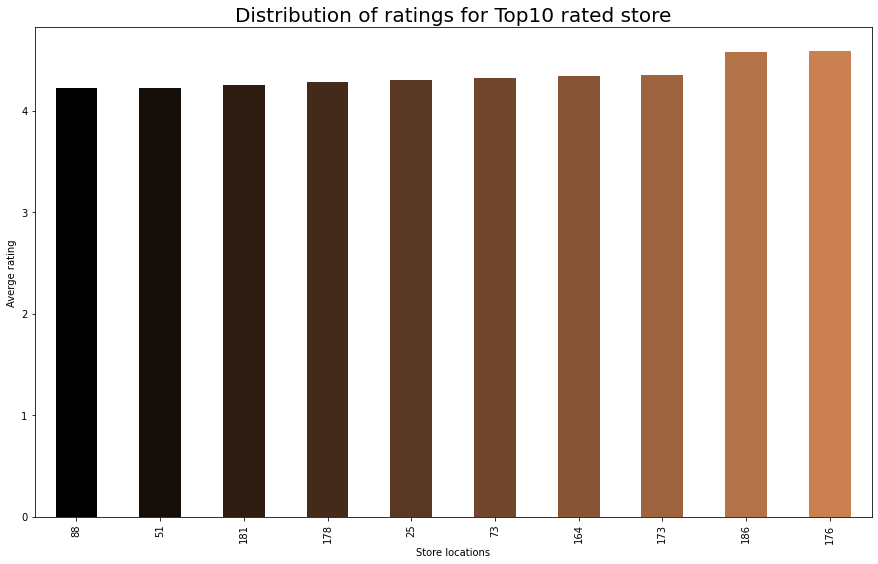

In [86]:
color = plt.cm.copper(np.linspace(0,1,15))
rating_Top_10.plot.bar(color = color,figsize = (15,9))

plt.title('Distribution of ratings for Top10 rated store',fontsize=20)
plt.xlabel('Store locations')
plt.ylabel('Averge rating')
plt.show()


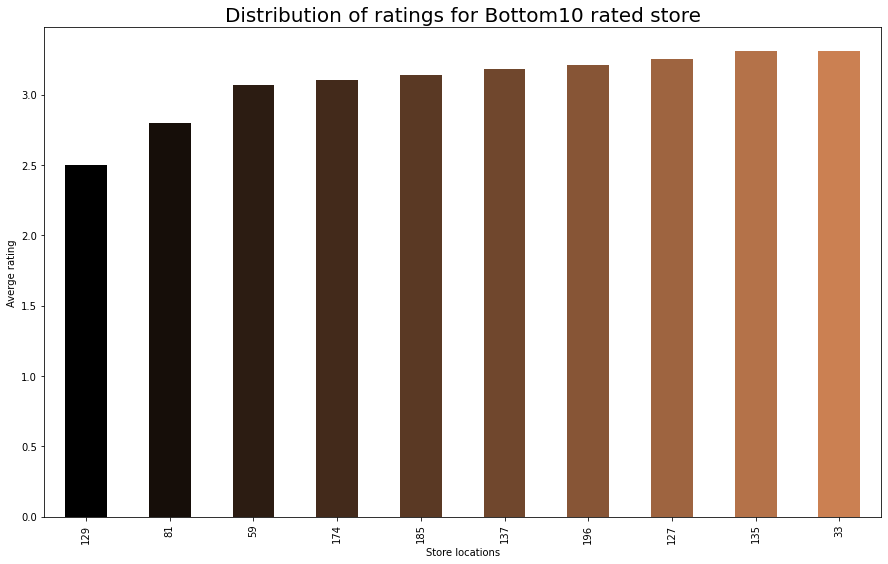

In [87]:
color = plt.cm.copper(np.linspace(0,1,15))
rating_bottom_10.plot.bar(color = color,figsize = (15,9))

plt.title('Distribution of ratings for Bottom10 rated store',fontsize=20)
plt.xlabel('Store locations')
plt.ylabel('Averge rating')
plt.show()

We merged the bj English reviews dataset with the bj store location information dataset to the find the top 10 and bottom 10 rating stores. The highest rated store is bj wholesale at 1899 Cinema Dr, Olean, NY 14760. The lowest rated store is bj wholesale at 1929 NE Pine Island Rd, Cape Coral, FL 33909.


### Do people write longer or shorter reviews and are those positive or negative?


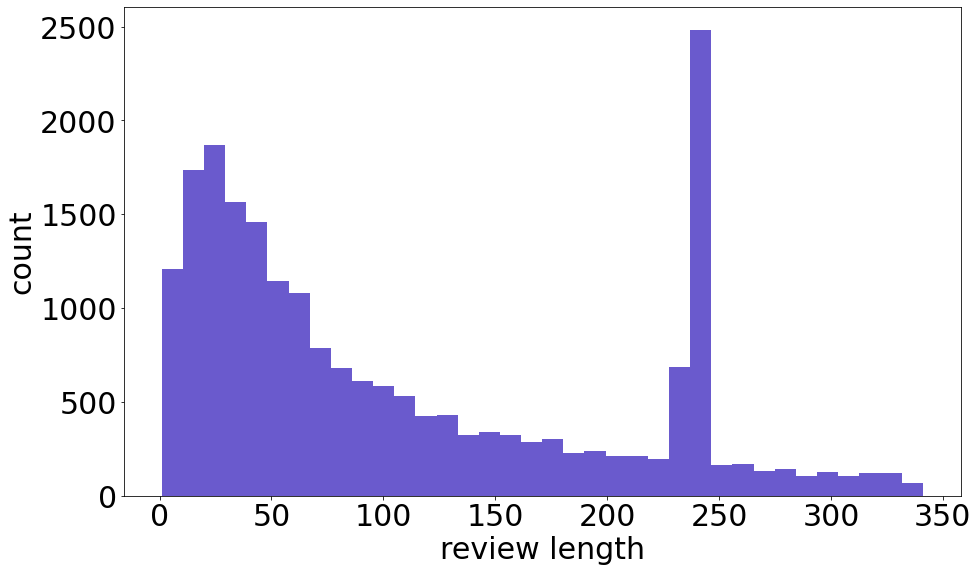

In [88]:
# Distribution of review length
bj_r_text_eng['length'] =  bj_r_text_eng['review'].apply(len)
bj_r_text_eng

#fig1= sns.distplot(bj_r_text_eng['length'], hist=True, 
             #bins=int(180/5), color = 'darkblue', 
             #hist_kws={'edgecolor':'black'})
plt.figure(figsize= (15,9))
plt.hist(bj_r_text_eng['length'], bins= int(180/5), color = 'slateblue')


plt.xlabel('review length', fontsize= 30)
plt.ylabel('count', fontsize= 30)
plt.tick_params(axis='both', labelsize=30)


We used the dataset with only English reviews.
It can be told that most customers prefer to writing reviews less than 100 characters.

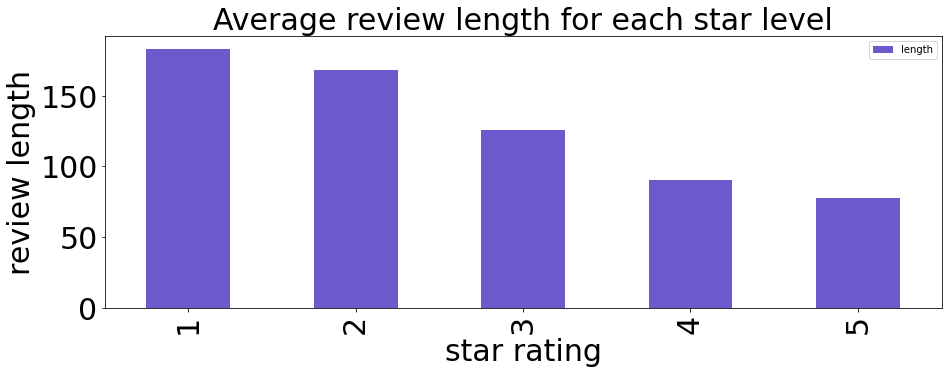

In [89]:
# Averge reviews length for each star rating level.

groupby_stars = bj_r_text_eng.groupby(['star rating'])['length'].mean()
groupby_stars = pd.DataFrame(data = groupby_stars)

fig= groupby_stars.plot.bar(color='slateblue',figsize = (15,5))
plt.rcParams['font.size'] = 20
plt.title('Average review length for each star level',fontsize = 30)
plt.xlabel('star rating', fontsize= 30)
plt.ylabel('review length', fontsize= 30)
for label in (fig.get_xticklabels() + fig.get_yticklabels()):
	label.set_fontsize(30)
plt.show()


In [ ]:
groupby_stars

It can be inferred from this graph that those who leave low star ratings write more text when they are leaving reviews.